In [ ]:
pip install odfpy

In [3]:
import pandas as pd 
import io 
import plotly.express as px 

In [4]:
df = pd.read_excel("/content/Fallecimientos_tipo.xlsx")

In [5]:
df

,TIPO,2016,2017,2018,2019,2020,2021,FALLECIMIENTOS_TOTALES
0,Aplastamiento,0,0,0,4,2,6,12
1,Atropello,324,275,241,310,214,179,1543
2,Caída,13,6,6,11,7,9,52
3,Colisiones,1179,913,846,1219,1061,965,6183
4,Deslizamiento,391,311,272,423,370,322,2089
5,Estrellamiento,67,63,56,93,74,52,405
6,Volcadura,7,6,4,9,3,6,35
7,Sin Especificación,0,0,0,1,1,0,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   TIPO                    8 non-null      object
 1   2016                    8 non-null      int64 
 2   2017                    8 non-null      int64 
 3   2018                    8 non-null      int64 
 4   2019                    8 non-null      int64 
 5   2020                    8 non-null      int64 
 6   2021                    8 non-null      int64 
 7   FALLECIMIENTOS_TOTALES  8 non-null      int64 
dtypes: int64(7), object(1)
memory usage: 640.0+ bytes


In [10]:
df.describe()

,2016,2017,2018,2019,2020,2021,FALLECIMIENTOS_TOTALES
count,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000
mean,247.625000,196.750000,178.125000,258.750000,216.50000,192.375000,1290.125000
std,407.441473,316.289086,292.071634,419.905687,366.25089,332.467372,2132.301938
min,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,2.000000
25%,5.250000,4.500000,3.000000,7.750000,2.75000,6.000000,29.250000
50%,40.000000,34.500000,31.000000,52.000000,40.50000,30.500000,228.500000
75%,340.750000,284.000000,248.750000,338.250000,253.00000,214.750000,1679.500000
max,1179.000000,913.000000,846.000000,1219.000000,1061.00000,965.000000,6183.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9171213590>,
      dtype=object)

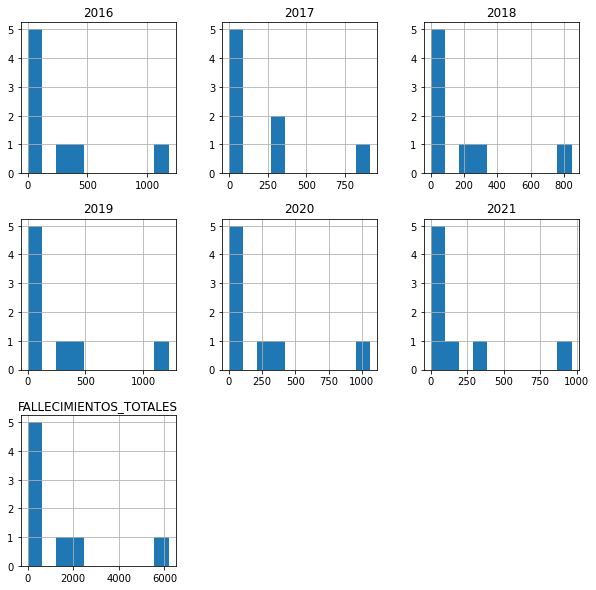

In [8]:
df.hist(figsize=(10,10))

In [9]:
df.isna().sum()

TIPO                      0
2016                      0
2017                      0
2018                      0
2019                      0
2020                      0
2021                      0
FALLECIMIENTOS_TOTALES    0
dtype: int64

In [12]:
df['TIPO'].replace(['Aplastamiento', 'Atropello', 'Caída', 'Colisiones',
       'Deslizamiento', 'Estrellamiento', 'Volcadura',
       'Sin Especificación'],[0,1,2,3,4,5,6,7],inplace=True)

In [13]:
df["TIPO"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [14]:
df

,TIPO,2016,2017,2018,2019,2020,2021,FALLECIMIENTOS_TOTALES
0,0,0,0,0,4,2,6,12
1,1,324,275,241,310,214,179,1543
2,2,13,6,6,11,7,9,52
3,3,1179,913,846,1219,1061,965,6183
4,4,391,311,272,423,370,322,2089
5,5,67,63,56,93,74,52,405
6,6,7,6,4,9,3,6,35
7,7,0,0,0,1,1,0,2


<BarContainer object of 8 artists>

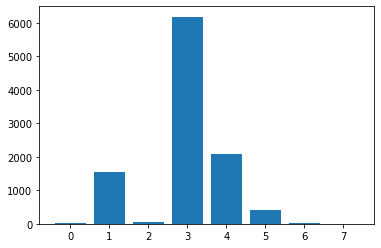

In [22]:
import matplotlib.pyplot as plt

plt.bar(df['TIPO'],df['FALLECIMIENTOS_TOTALES'])

# MODELO REGRESION LINEAL

In [23]:
Entrenamiento = df.sample(frac=0.6,random_state=0)
test =  df.drop(Entrenamiento.index)

In [24]:
print(Entrenamiento)
print('---------------------------------')
print(test)

   TIPO  2016  2017  2018  2019  2020  2021  FALLECIMIENTOS_TOTALES
6     6     7     6     4     9     3     6                      35
2     2    13     6     6    11     7     9                      52
1     1   324   275   241   310   214   179                    1543
7     7     0     0     0     1     1     0                       2
3     3  1179   913   846  1219  1061   965                    6183
---------------------------------
   TIPO  2016  2017  2018  2019  2020  2021  FALLECIMIENTOS_TOTALES
0     0     0     0     0     4     2     6                      12
4     4   391   311   272   423   370   322                    2089
5     5    67    63    56    93    74    52                     405


In [25]:
etiquetas_entrenamiento = Entrenamiento.pop('FALLECIMIENTOS_TOTALES')
etiquetas_test = test.pop('FALLECIMIENTOS_TOTALES')

In [26]:
print(etiquetas_entrenamiento)
print(etiquetas_test)

6      35
2      52
1    1543
7       2
3    6183
Name: FALLECIMIENTOS_TOTALES, dtype: int64
0      12
4    2089
5     405
Name: FALLECIMIENTOS_TOTALES, dtype: int64


In [ ]:
etiquetas_test

0    1657
4    1516
Name: FALLECIMIENTOS_TOTALES, dtype: int64

In [27]:
#Entrenar el modelo con una regresion lineal 
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(Entrenamiento,etiquetas_entrenamiento)

LinearRegression()

In [28]:
predicciones = modelo.predict(test)
predicciones

array([  11.2901987 , 2092.87658572,  407.11391231])

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(etiquetas_test,predicciones))
print("Error porcentual : %f" % (error))

Error porcentual : 2.582012


In [33]:
import numpy as np
import pandas as pd

casos = np.array([[12,500,550,800,1005,430,480]])
nuevo_casos = pd.DataFrame(casos,columns=['TIPO','2016','2017',	'2018',	'2019',	'2020', '2021'])
nuevo_casos

,TIPO,2016,2017,2018,2019,2020,2021
0,12,500,550,800,1005,430,480


In [34]:
predicciones = modelo.predict(nuevo_casos)
predicciones

array([3749.18301976])